In [9]:
import numpy as np
from astropy.modeling.models import BlackBody
import astropy.units as u
import matplotlib.pyplot as plt
from dust_extinction.parameter_averages import G23
from dust_extinction.parameter_averages import F19
from dust_extinction.parameter_averages import F99
import sncosmo
import pandas as pd
from bayesn import SEDmodel

#3D plotting
from mpl_toolkits.mplot3d import axes3d

##Second program
import extinction

In [19]:
# wavelengths and spectrum are 1D arrays
# wavelengths between 1000 and 30000 A
wavelengths = np.logspace(np.log10(0.1), np.log10(10), num=1000)*u.micron
#wavelengths2 = np.logspace(np.log10(0.3), np.log10(3.0), num=1000)*u.micron
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
spectrum = bb_lam(wavelengths)

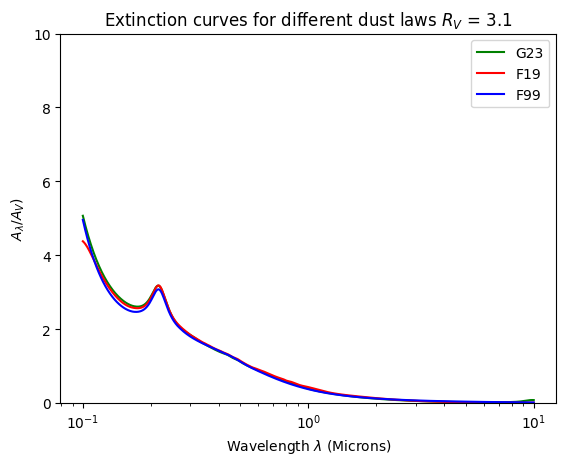

In [20]:
RV_All = 3.1
extG23 = G23(Rv=RV_All)
extF19 = F19(Rv=RV_All)
extF99 = F99(Rv=RV_All)

plt.xlabel(rf'Wavelength $\lambda$ (Microns)')
plt.ylabel(rf'$A_\lambda$/$A_V$)')
plt.title(rf'Extinction curves for different dust laws $R_V$ = '+str(RV_All))
plt.plot(wavelengths, extG23(wavelengths), 'g', label = rf"G23")
plt.plot(wavelengths, extF19(wavelengths), 'r', label = rf"F19")
plt.plot(wavelengths, extF99(wavelengths),  'b', label = rf"F99")
x_1 = np.linspace(0, 20, 1000)
#plt.plot(x_1-x_1+0.5,x_1, 'y')
#plt.plot(x_1-x_1+0.7,x_1, 'y', label = "V band region 0.5-0.7 microns")
plt.ylim(0,10)
plt.xscale("log")
plt.legend()
plt.savefig("/root/partiiiproject/ExtinctionCurvePlots/DustCurveMilkyWay.png", bbox_inches='tight') #save plot

[[ 0.1         0.10046204  0.10092622 ...  9.9082281   9.95400829
  10.        ]
 [ 0.1         0.10046204  0.10092622 ...  9.9082281   9.95400829
  10.        ]
 [ 0.1         0.10046204  0.10092622 ...  9.9082281   9.95400829
  10.        ]
 ...
 [ 0.1         0.10046204  0.10092622 ...  9.9082281   9.95400829
  10.        ]
 [ 0.1         0.10046204  0.10092622 ...  9.9082281   9.95400829
  10.        ]
 [ 0.1         0.10046204  0.10092622 ...  9.9082281   9.95400829
  10.        ]]


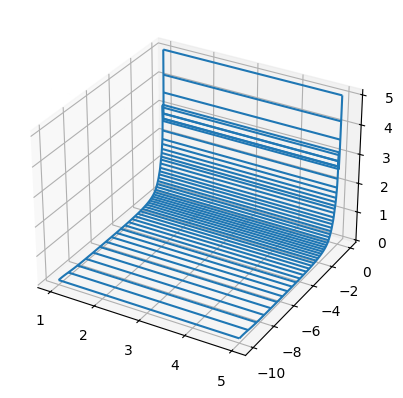

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
#X, Y, Z = axes3d.get_test_data(0.05)

#Generate the X Y Z (Rv, wavelength, extinction)
wavelengths = np.logspace(np.log10(0.1), np.log10(10), num=1000)*u.micron
X = np.zeros((len(np.linspace(1,5,20)),len(wavelengths)))
Y= np.zeros((len(np.linspace(1,5,20)),len(wavelengths)))
Z= np.zeros((len(np.linspace(1,5,20)),len(wavelengths)))


for index, Rv_All in enumerate(np.linspace(1,5,20)):
    extG23 = G23(Rv=RV_All)
    X[index, :]= Rv_All
    Y[index, :]= wavelengths
    Z[index, :]= extG23(wavelengths)
# Plot a basic wireframe.
print(Y)

ax.plot_wireframe(X, -Y, Z, rstride=20, cstride=20)

plt.show()